# Logistic Regression
# H.KianAra

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/bank-full.csv', delimiter=';' , header=0)
#df = df.dropna()
df['y'].replace(to_replace=['yes', 'no'], value=[1, 0], inplace= True )

print(df.columns.values)

colLabel = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
newDf = pd.DataFrame()
for var in colLabel:
  newDf = df.join(pd.get_dummies(df[var], prefix= var))
  df = newDf

data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in colLabel]
dFinal = df[to_keep]
dFinal.head(3)

['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y']


,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

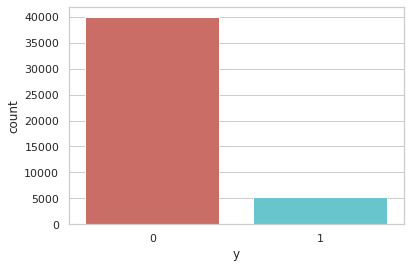

In [ ]:
sns.countplot(x='y', data=df, palette='hls')
plt.show()

Text(0, 0.5, 'Frequency of Purchase')

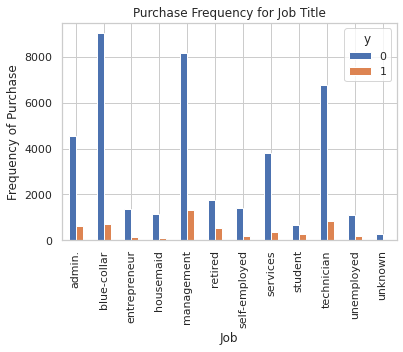

In [ ]:
%matplotlib inline
pd.crosstab(df.job, df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

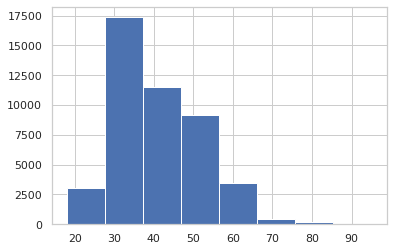

In [ ]:
df.age.hist(bins=8)

In [ ]:
print(len(df[df['y']==0]))
print(len(dFinal[dFinal['y']==1]))

39922
5289


In [ ]:
df[df['age'] > 90]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
31233,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
33699,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
41663,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
41934,92,retired,married,unknown,no,775,no,no,cellular,22,oct,313,3,-1,0,unknown,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
42727,92,retired,married,unknown,no,775,no,no,cellular,26,jan,164,4,96,3,success,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
44262,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
44420,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
x = dFinal.loc[:, dFinal.columns != 'y']
#y = df.loc[:, dFinal.columns == 'y']
y = dFinal.iloc[:, -1]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
model = LogisticRegression()
model.fit(X_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix

print('Accuracy is : %.3f' % model.score(X_test, y_test))
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

Accuracy is : 0.554


array([[ 812,    0],
       [2018, 1692]])

In [ ]:
yProb = model.predict_proba(X_test)
yProb

array([[1.00000000e+00, 1.86037983e-16],
       [1.27593935e-10, 1.00000000e+00],
       [1.07047704e-11, 1.00000000e+00],
       ...,
       [1.37048251e-06, 9.99998630e-01],
       [1.60291545e-05, 9.99983971e-01],
       [1.00000000e+00, 1.39560439e-22]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      1.00      0.45       812
           1       1.00      0.46      0.63      3710

    accuracy                           0.55      4522
   macro avg       0.64      0.73      0.54      4522
weighted avg       0.87      0.55      0.59      4522



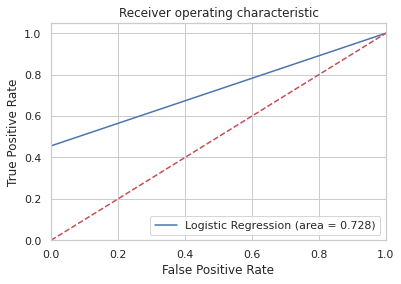

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

RocCurve = roc_auc_score(y_test, y_pred)
#fpr, tpr, thresholds = roc_curve(y_test, yProb[:,1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % RocCurve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()